Linear regression

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
import sys
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Tensorflow version 1.2.1
Pandas version 0.20.1
Numpy version 1.12.1


In [3]:
# Create Training Data

# y = m * x + b  

# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)

# let's compute train_y using 0.1 for m and 0.3 for b
train_y = 0.1 * train_x + 0.3


df = pd.DataFrame({'x':train_x,
                   'y':train_y})
df.head()

,x,y
0,0.234574,0.323457
1,0.693260,0.369326
2,0.240272,0.324027
3,0.485490,0.348549
4,0.226092,0.322609


In [4]:
df.describe()

,x,y
count,100.000000,100.000000
mean,0.440815,0.344081
std,0.294235,0.029423
min,0.022906,0.302291
25%,0.191346,0.319135
50%,0.415893,0.341589
75%,0.653576,0.365358
max,0.999277,0.399928


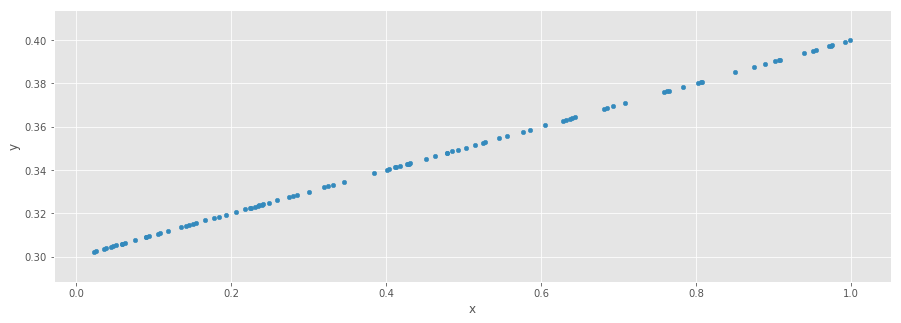

In [5]:
df.plot.scatter(x='x', y='y', figsize=(15,5));

In [6]:
# create test data

# this is the data we are going to use to make sure our model is generating good predictions
test_x = np.random.rand(100).astype(np.float32)

Model your Graph

- loss - There are various functions you can choose to measure the error between train_y (your training data) and pred (your models predicted value)
- GradientDescentOptimizer(LEARNING_RATE) - Modify this number to see how your results change

Variables
When your model runs it will initialize your variables W and b. On every training iteration it will adjust the values for variables W and b. For this to occur, you need to define W and b as variables.

- Constants - Values created before you run our model that do not change.
- Placeholders - Values that are fed into your model at run time.
- Variables - Values that are modified at run time by your model.
- W - Weights for your output layer.
- b - Biases for your output layer.

In [8]:
# placeholders
x = tf.placeholder(tf.float32, name="01_x")
y = tf.placeholder(tf.float32, name="01_y")

# variables
# Note that np.random.rand() is used to initialize your variables
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = tf.multiply(W, x) + b

# minimize the mean squared errors
# as mentioned above there are other ways to measure the error between train_y and pred
loss = tf.reduce_mean(tf.square(pred - y))

# we pick our optimizer and a learning rate
optimizer = tf.train.GradientDescentOptimizer(0.7)

# we train our model by minimizing our loss function
train = optimizer.minimize(loss)

In [9]:
# Training

# initialize the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)

    # fit the function.
    for step in range(200):
        # get your data
        train_data = {x:train_x, y:train_y}
        
        # training in progress...
        sess.run(train, feed_dict=train_data)        
        
        # print the last 20 results
        if step > 180:
            print(step, sess.run(W), sess.run(b))
            
    # note that W and b mach the line we are tying to model (y = 0.1x + 0.3)
    print("Training completed:", "W=", sess.run(W), "b=", sess.run(b))
    
    # run your trained model on the test data set
    test_results = sess.run(pred, feed_dict={x: test_x})
    
    # capture the predicted results so you can plot them
    df_final = pd.DataFrame({'test_x':test_x,
                             'pred':test_results})

181 0.1 0.3
182 0.1 0.3
183 0.1 0.3
184 0.1 0.3
185 0.1 0.3
186 0.1 0.3
187 0.1 0.3
188 0.1 0.3
189 0.1 0.3
190 0.1 0.3
191 0.1 0.3
192 0.1 0.3
193 0.1 0.3
194 0.1 0.3
195 0.1 0.3
196 0.1 0.3
197 0.1 0.3
198 0.1 0.3
199 0.1 0.3
Training completed: W= 0.1 b= 0.3


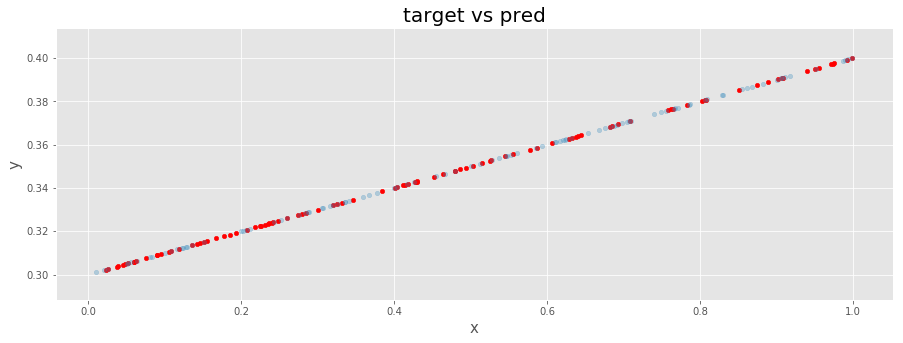

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15);